## ATAC + MULTIOME (germ cells) - september 2021

### Build anndata from cellatac output 

In [1]:
# Load libraries
import pandas as pd 
import scanpy as sc
import numpy as np
import scipy.sparse

In [2]:
# Define variables
outdir = "/nfs/team292/vl6/my_MULTIOME_dir/germcells_july2021/"
experiment_prefix = 'germcells_'
cellatac_outdir = '/lustre/scratch117/cellgen/cellgeni/TIC-atacseq/tic-1138/germ-results200k/'


In [3]:
input={'cnts': cellatac_outdir + 'peak_matrix/peaks_bc_matrix.mmtx.gz',
        "bcs": cellatac_outdir + 'peak_matrix/bc.txt',
      "peaks": cellatac_outdir + 'peak_matrix/peaks.txt',
      'clusters': cellatac_outdir + 'qc/seurat-clades.tsv'}

output = {
    "cnt_mmtx":outdir + experiment_prefix + '_ATAC_cisTopic.mmtx',
    "cnt_peaks":outdir + experiment_prefix + '_ATAC_cisTopic.peaks.tsv',
    "cnt_cells":outdir + experiment_prefix + '_ATAC_cisTopic.cells.tsv',
    "h5ad":outdir + experiment_prefix + '_ATAC_raw.h5ad',
}

#### Make anndata object

In [4]:
adata = sc.read_mtx(input["cnts"]).T

bc = pd.read_table(input["bcs"], header=None)
feat = pd.read_table(input["peaks"], header=None)

adata.obs_names = bc[0]
adata.var_names = feat[0]

In [5]:
adata

AnnData object with n_obs × n_vars = 10387 × 173584

In [6]:
# Code from cell barcodes 
adata.obs['code'] = [name[0:2] for name in adata.obs_names]
adata.obs['code'].value_counts(dropna = False)

05    1878
15    1237
02    1219
01    1164
04     957
03     720
16     429
19     416
14     414
24     351
25     293
20     292
18     228
07     216
17     148
10     120
23      94
22      46
06      39
09      38
21      33
26      18
12      15
13       9
11       7
08       6
Name: code, dtype: int64

In [7]:
# Sample from code 
sample_dictionary = {'01' : 'FCA_GND10288176', '02' : 'FCA_GND10288177', '03' : 'FCA_GND10288178', 
                    '04' : 'FCA_GND10288179', '05' : 'FCA_GND10288180', '06' : 'FCA_GND8046539', 
                     '07' : 'FCA_GND8768481', '08' : 'FCA_GND8768482', '09' : 'FCA_GND8768484', 
                     '10' : 'FCA_GND8768485', '11' : 'FCA_GND8795927', '12' : 'FCA_GND8795928', 
                    '13' : 'FCA_GND9332157', '14' : 'HCA_F_GON10535399', '15' : 'HCA_F_GON10687818', 
                    '16' : 'HCA_F_GON10687819', '17' : 'HCA_F_GON10687820', '18' : 'HD_F_GON9479873',
                    '19' : 'HD_F_GON9479874', '20' : 'HD_F_GON9479875', '21' : 'HD_F_GON9525611',
                    '22' : 'HD_F_GON9525612', '23' : 'HD_F_GON9883955', '24' : 'HD_F_GON9883958', 
                    '25' : 'HD_F_GON9883959', '26' : 'HD_F_GON9883960'}
adata.obs['sample'] = adata.obs['code'].map(sample_dictionary) 
adata.obs['sample'].value_counts(dropna = False)

FCA_GND10288180      1878
HCA_F_GON10687818    1237
FCA_GND10288177      1219
FCA_GND10288176      1164
FCA_GND10288179       957
FCA_GND10288178       720
HCA_F_GON10687819     429
HD_F_GON9479874       416
HCA_F_GON10535399     414
HD_F_GON9883958       351
HD_F_GON9883959       293
HD_F_GON9479875       292
HD_F_GON9479873       228
FCA_GND8768481        216
HCA_F_GON10687820     148
FCA_GND8768485        120
HD_F_GON9883955        94
HD_F_GON9525612        46
FCA_GND8046539         39
FCA_GND8768484         38
HD_F_GON9525611        33
HD_F_GON9883960        18
FCA_GND8795928         15
FCA_GND9332157          9
FCA_GND8795927          7
FCA_GND8768482          6
Name: sample, dtype: int64

In [67]:
adata.obs.tail()

,code,sample
26-TCGGGACGTCTGATTG-1,26,HD_F_GON9883960
26-TCTCAGCAGTATACCC-1,26,HD_F_GON9883960
26-TGAGCCGAGTACAGAT-1,26,HD_F_GON9883960
26-TGGCCTTCATCCCTCA-1,26,HD_F_GON9883960
26-TGTGGCGAGACACAAT-1,26,HD_F_GON9883960


In [9]:
sex_dictionary = {'HCA_F_GON10535399' : 'female', 'HCA_F_GON10687818' : 'female', 'FCA_GND8046539' : 'female', 
                    'FCA_GND8768483' : 'female', 'FCA_GND8768484' : 'female', 'FCA_GND8768485' : 'female', 
                     'HD_F_GON9479873' : 'female', 'HD_F_GON9479874' : 'female', 'HD_F_GON9479875' : 'female', 
                'HD_F_GON9883959' : 'female', 'HD_F_GON9883960' : 'female', 
                   'FCA_GND10288176' : 'female', 'FCA_GND10288177' : 'female', 'FCA_GND10288178' : 'female', 
                    'FCA_GND10288179' : 'female', 'FCA_GND10288180' : 'female', 
                 'HCA_F_GON10687819' : 'male', 'HCA_F_GON10687820' : 'male', 'FCA_GND8768481' : 'male', 
                   'FCA_GND8768482' : 'male', 'FCA_GND8768487' : 'male', 'FCA_GND8795927' : 'male',
                     'FCA_GND8795928' : 'male', 'HD_F_GON9479872' : 'male', 'HD_F_GON9525611' : 'male', 
                     'HD_F_GON9525612' : 'male', 'FCA_GND9332157' : 'male', 'HD_F_GON9883958' : 'male',
                     'HD_F_GON9883955' : 'male'}
adata.obs['sex'] = adata.obs['sample'].map(sex_dictionary)
adata.obs['sex'].value_counts(dropna = False)

female    9033
male      1354
Name: sex, dtype: int64

In [10]:
stage_dictionary = {'FCA_GND8046539' : '8 PCW', 'FCA_GND8768484' : '8 PCW', 'FCA_GND8768483' : '14 PCW', 
                    'HD_F_GON9479874' : '14 PCW', 'HD_F_GON9479873' : '13 PCW',
                  'HD_F_GON9479875' : '14 PCW', 
                    'FCA_GND8768485' : '9 PCW', 
                   'HD_F_GON9883959' : '18 PCW', 'HD_F_GON9883960' : '21 PCW', 
                   'FCA_GND10288176' : '21 PCW', 
                 'FCA_GND10288177' : '21 PCW', 'FCA_GND10288178' : '14 PCW', 'FCA_GND10288179' : '20 PCW', 
                 'FCA_GND10288180' : '20 PCW', 'HCA_F_GON10535399' : '8.6 PCW', 'HCA_F_GON10687818' : '13 PCW',
                    'HCA_F_GON10687819' : '19 PCW', 'HCA_F_GON10687820' : '8.8 PCW', 'FCA_GND8768481' : '19 PCW', 
                   'FCA_GND8768482' : '9 PCW', 'FCA_GND8768487' : '12 PCW', 'FCA_GND8795927' : '7 PCW',
                     'FCA_GND8795928' : '12 PCW', 'HD_F_GON9479872' : '15 PCW', 'HD_F_GON9525611' : '12 PCW', 
                     'HD_F_GON9525612' : '12 PCW', 'FCA_GND9332157' : '17 PCW', 'HD_F_GON9883958' : '21 PCW',
                     'HD_F_GON9883955' : '17 PCW'
                  }
adata.obs['stage'] = adata.obs['sample'].map(stage_dictionary)
adata.obs['stage'].value_counts(dropna = False)

20 PCW     2835
21 PCW     2752
13 PCW     1465
14 PCW     1428
19 PCW      645
8.6 PCW     414
18 PCW      293
8.8 PCW     148
9 PCW       126
17 PCW      103
12 PCW       94
8 PCW        77
7 PCW         7
Name: stage, dtype: int64

In [11]:
individual_dictionary = {'FCA_GND8046539' : 'F81', 'FCA_GND8768484' : 'Hrv12', 'FCA_GND8768483' : 'Hrv11', 
                    'HD_F_GON9479874' : 'Hrv50', 'HD_F_GON9479871' : 'Hrv39', 'HD_F_GON9479873' : 'Hrv49',
                  'HD_F_GON9479875' : 'Hrv50', 
                    'FCA_GND8768485' : 'Hrv13', 
                        'HD_F_GON9883959' : 'Hrv59', 'HD_F_GON9883960' : 'Hrv58', 
                         'FCA_GND10288176' : 'Hrv58', 
                 'FCA_GND10288177' : 'Hrv58', 'FCA_GND10288178' : 'Hrv39', 'FCA_GND10288179' : 'Hrv65', 
                 'FCA_GND10288180' : 'Hrv65', 'HCA_F_GON10535399' : 'Hrv92', 'HCA_F_GON10687818' : 'Hrv91', 
                         'HCA_F_GON10687819' : 'Hrv3', 'HCA_F_GON10687820' : 'Hrv41', 'FCA_GND8768481' : 'Hrv3', 
                   'FCA_GND8768482' : 'Hrv10', 'FCA_GND8768487' : 'Hrv15', 'FCA_GND8795927' : 'Hrv17',
                     'FCA_GND8795928' : 'Hrv18', 'HD_F_GON9479872' : 'Hrv40', 'HD_F_GON9525611' : 'Hrv15', 
                     'HD_F_GON9525612' : 'Hrv15', 'FCA_GND9332157' : 'Hrv21', 'HD_F_GON9883958' : 'Hrv54',
                     'HD_F_GON9883955' : 'Hrv55'
                        }
adata.obs['individual'] = adata.obs['sample'].map(individual_dictionary)
adata.obs['individual'].value_counts(dropna = False)

Hrv65    2835
Hrv58    2401
Hrv91    1237
Hrv39     720
Hrv50     708
Hrv3      645
Hrv92     414
Hrv54     351
Hrv59     293
Hrv49     228
Hrv41     148
Hrv13     120
Hrv55      94
Hrv15      79
F81        39
Hrv12      38
Hrv18      15
Hrv21       9
Hrv17       7
Hrv10       6
Name: individual, dtype: int64

In [12]:
adata

AnnData object with n_obs × n_vars = 10387 × 173584
    obs: 'code', 'sample', 'sex', 'stage', 'individual'

#### Load peak annotations (done with R script by Emma)

In [13]:
peak_anno_df = pd.read_csv(outdir + "ATACpeaks_annotation.csv", index_col=0)
peak_anno_df.index = peak_anno_df["peak_id"]
peak_anno_df.drop("peak_id",1, inplace=True)
adata.var = pd.concat([adata.var, peak_anno_df], 1)

#### Save binary data to layers

In [14]:
adata.layers["binary_raw"] = adata.X
adata.layers["binary_raw"][adata.layers["binary_raw"] > 1] = 1
adata

AnnData object with n_obs × n_vars = 10387 × 173584
    obs: 'code', 'sample', 'sex', 'stage', 'individual'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist'
    layers: 'binary_raw'

In [15]:
celltype = sc.read('/nfs/team292/vl6/my_MULTIOME_dir/germcells_july2021/germcells__harmony_ATACwCisTopic.h5ad')
celltype

AnnData object with n_obs × n_vars = 8901 × 120127
    obs: 'cellatac_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'multiome_GermCells', 'code', 'sample', 'sex', 'stage', 'individual', 'doublet_score', 'doublet_score_0.75', 'leiden', 'leiden_R', 'PGC', 'GC', 'oocyte', 'pre_oocyte', 'oogonia_STRA8', 'oogonia_meiotic', 'pre_spermatogonia', 'max', 'cell_type'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_type_colors', 'cellatac_clusters_colors', 'germ_colors', 'germcells_colors', 'individual_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'multiome_GermCells_colors', 'neighbors', 'sample_colors', 'sex

In [18]:
adata.obs['cell_type'] = adata.obs_names.map(celltype.obs['cell_type'].to_dict())

In [20]:
adata.obs['cell_type'] = adata.obs['cell_type'].fillna('lowQC/other')
adata.obs['cell_type'].value_counts(dropna = False)

PGC                  3016
oogonia_STRA8        2467
lowQC/other          1486
oogonia_meiotic      1466
GC                    903
pre_spermatogonia     459
oocyte                442
pre_oocyte            148
Name: cell_type, dtype: int64

In [21]:
adata.write('/nfs/team292/vl6/forShaista/germcells_ATAC.h5ad')

... storing 'code' as categorical
... storing 'sample' as categorical
... storing 'sex' as categorical
... storing 'stage' as categorical
... storing 'individual' as categorical
... storing 'cell_type' as categorical
... storing 'annotation' as categorical
... storing 'gene_name' as categorical
... storing 'gene_id' as categorical


In [22]:
adata

AnnData object with n_obs × n_vars = 10387 × 173584
    obs: 'code', 'sample', 'sex', 'stage', 'individual', 'cell_type'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist'
    layers: 'binary_raw'

#### Load annotations of snRNAseq from MULTIOME samples 

In [70]:
path_to_multiome = '/nfs/team292/lg18/with_valentina/gonadsV2_revision/'

**!!! Library_ATAC has wrong codes, replace them with correct ones**

In [71]:
germcells_female = pd.read_csv(path_to_multiome + 'multiomics_female_germcells.csv')
germcells_female.head()

,Unnamed: 0,n_genes,sample,donor,Library_ATAC,Library_RNA,iRods_path,percent_mito,n_counts,batch,...,bonf_pval,pcw,lineage,celltype_samplespecific,S_score,G2M_score,phase,leiden,leiden_R,celltype
0,HCA_F_GON10535495_AAACCAACACGAATTT,5728,HCA_F_GON10535495,Hrv92,HCA_F_GON10535399,HCA_F_GON10535495,/seq/illumina/cellranger-arc/cellranger-arc101...,0.014532,4735.2485,0,...,1.0,8.6,GermCells,NaN,0.237842,0.087936,S,0,0,PGC
1,HCA_F_GON10535495_AACCCGCAGTTTGAGC,5456,HCA_F_GON10535495,Hrv92,HCA_F_GON10535399,HCA_F_GON10535495,/seq/illumina/cellranger-arc/cellranger-arc101...,0.017976,4645.2330,0,...,1.0,8.6,GermCells,NaN,0.037234,-0.421033,S,0,0,PGC
2,HCA_F_GON10535495_AACGACAAGCGGCTGT,5901,HCA_F_GON10535495,Hrv92,HCA_F_GON10535399,HCA_F_GON10535495,/seq/illumina/cellranger-arc/cellranger-arc101...,0.018170,4060.9746,0,...,1.0,8.6,GermCells,NaN,0.114108,4.491824,G2M,0,0,PGC
3,HCA_F_GON10535495_AACTTAGTCTTGTCCA,6781,HCA_F_GON10535495,Hrv92,HCA_F_GON10535399,HCA_F_GON10535495,/seq/illumina/cellranger-arc/cellranger-arc101...,0.020457,4499.4067,0,...,1.0,8.6,GermCells,NaN,0.002280,6.158810,G2M,0,0,PGC
4,HCA_F_GON10535495_AAGACCAAGCACCACA,4881,HCA_F_GON10535495,Hrv92,HCA_F_GON10535399,HCA_F_GON10535495,/seq/illumina/cellranger-arc/cellranger-arc101...,0.015051,4630.9404,0,...,1.0,8.6,GermCells,NaN,-0.099797,-0.189805,G1,0,0,PGC


In [72]:
germcells_male = pd.read_csv(path_to_multiome + 'multiomics_male_germcells.csv')
germcells_male.head()

,Unnamed: 0,n_genes,sample,donor,Library_ATAC,Library_RNA,iRods_path,percent_mito,n_counts,batch,...,bh_pval,bonf_pval,pcw,lineage,celltype_samplespecific,S_score,G2M_score,phase,leiden,celltype
0,HCA_F_GON10713286_AAACGCGCACTGGCCA,5701,HCA_F_GON10713286,Hrv41,HCA_F_GON10687820,HCA_F_GON10713286,/seq/illumina/cellranger-arc/cellranger-arc101...,0.001894,18223.0,0,...,0.901686,1.000000,8.8,GermCells,NaN,1.146592,0.513035,S,2,PGC_mitotic
1,HCA_F_GON10713286_AACAGCAAGAGGAGGA,6154,HCA_F_GON10713286,Hrv41,HCA_F_GON10687820,HCA_F_GON10713286,/seq/illumina/cellranger-arc/cellranger-arc101...,0.002846,20717.0,0,...,0.901686,1.000000,8.8,GermCells,NaN,0.037504,-0.186892,S,0,PGC
2,HCA_F_GON10713286_AACAGCAAGCTAAAGG,5009,HCA_F_GON10713286,Hrv41,HCA_F_GON10687820,HCA_F_GON10713286,/seq/illumina/cellranger-arc/cellranger-arc101...,0.001948,15032.0,0,...,0.901686,1.000000,8.8,GermCells,NaN,-0.347650,-0.672939,G1,0,PGC
3,HCA_F_GON10713286_AACAGCAAGTCAATCA,8263,HCA_F_GON10713286,Hrv41,HCA_F_GON10687820,HCA_F_GON10713286,/seq/illumina/cellranger-arc/cellranger-arc101...,0.003338,38623.0,0,...,0.000037,0.010037,8.8,GermCells,NaN,0.018986,3.420874,G2M,2,PGC_mitotic
4,HCA_F_GON10713286_AACATCATCCACCCTG,5685,HCA_F_GON10713286,Hrv41,HCA_F_GON10687820,HCA_F_GON10713286,/seq/illumina/cellranger-arc/cellranger-arc101...,0.001917,17283.0,0,...,0.901686,1.000000,8.8,GermCells,NaN,0.281357,-0.657518,S,0,PGC


In [73]:
germcells_female['Library_ATAC'].value_counts()

FCA_GND10288180      1171
HCA_F_GON10687818    1091
FCA_GND10288176       942
FCA_GND10288177       923
FCA_GND10288179       781
FCA_GND10288178       533
HCA_F_GON10535399     252
Name: Library_ATAC, dtype: int64

In [74]:
germcells_male['Library_ATAC'].value_counts()

HCA_F_GON10687819    475
HCA_F_GON10687820    194
HD_F_GON9525612       38
HD_F_GON9525611       32
Name: Library_ATAC, dtype: int64

In [75]:
germcells = germcells_female.append(germcells_male)
germcells['Library_ATAC'].value_counts(dropna = False)

FCA_GND10288180      1171
HCA_F_GON10687818    1091
FCA_GND10288176       942
FCA_GND10288177       923
FCA_GND10288179       781
FCA_GND10288178       533
HCA_F_GON10687819     475
HCA_F_GON10535399     252
HCA_F_GON10687820     194
HD_F_GON9525612        38
HD_F_GON9525611        32
Name: Library_ATAC, dtype: int64

In [76]:
code_correspondence = {'FCA_GND10288180' : '05', 'HCA_F_GON10687818' : '15', 'FCA_GND10288176' : '01', 
                      'FCA_GND10288177' : '02', 'FCA_GND10288179' : '04', 'FCA_GND10288178' : '03', 
                      'HCA_F_GON10687819' : '16', 'HCA_F_GON10535399' : '14', 'HCA_F_GON10687820' : '17', 
                      'HD_F_GON9525612' : '22', 'HD_F_GON9525611' : '21'}

In [77]:
germcells['ATAC_code'] = germcells['Library_ATAC'].map(code_correspondence)

In [78]:
germcells['ATAC_code'].value_counts(dropna = False)

05    1171
15    1091
01     942
02     923
04     781
03     533
16     475
14     252
17     194
22      38
21      32
Name: ATAC_code, dtype: int64

In [79]:
germcells['barcode'] = [i.split('_')[-1] for i in germcells['Unnamed: 0']]

In [80]:
germcells['ATAC_barcode'] = germcells['ATAC_code'] + '-' + germcells['barcode'] + '-1'

In [81]:
adata.obs['multiome_GermCells'] = adata.obs_names.map(pd.Series(germcells.celltype.values,index=germcells.ATAC_barcode).to_dict())


In [82]:
adata.obs['multiome_GermCells'].value_counts(dropna = False)

NaN                 4667
oogonia_STRA8       2109
PGC                 1608
oogonia_meiotic     1136
preOocyte            294
preSpermatogonia     197
oocyte               157
PGC_mitotic          126
GC                    93
Name: multiome_GermCells, dtype: int64

#### Peak filtering

array([[<AxesSubplot:title={'center':'peak_width'}>]], dtype=object)

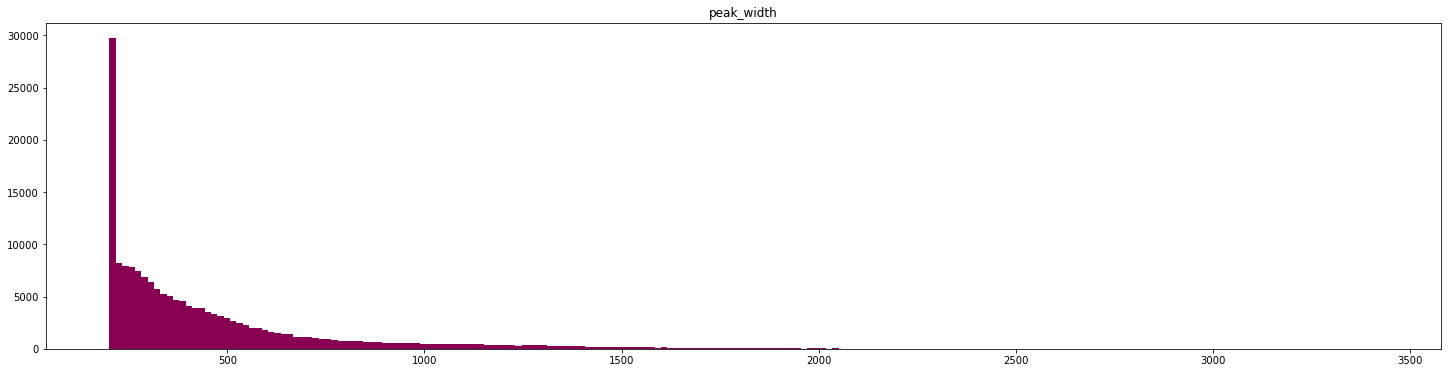

In [83]:
adata.var.hist(column = 'peak_width', bins = 200, grid = False, figsize = (25,6), color = '#870052')

In [84]:
var_qc = sc.pp.calculate_qc_metrics(adata, layer = "binary_raw")[1]
adata.var = pd.concat([adata.var, var_qc], 1)
adata

AnnData object with n_obs × n_vars = 10387 × 173584
    obs: 'code', 'sample', 'multiome_GermCells'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'binary_raw'

In [85]:
adata.var.head()

,peak_width,exon,gene,promoter,annotation,gene_name,gene_id,tss_distance,ENCODE_blacklist,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
chr1:10051-10498,448,0,0,0,intergenic,NaN,NaN,58592,1,211,0.020314,0.020110,97.968615,211.0,5.356586
chr1:180726-181621,896,0,0,1,promoter,FO538757.2,ENSG00000279928,771,1,2344,0.225667,0.203485,77.433330,2344.0,7.760041
chr1:191249-191603,355,0,1,0,intron,FO538757.1,ENSG00000279457,3807,1,130,0.012516,0.012438,98.748436,130.0,4.875197
chr1:267875-268082,208,0,0,0,intergenic,NaN,NaN,67552,1,66,0.006354,0.006334,99.364590,66.0,4.204693
chr1:586080-586285,206,0,0,0,intergenic,NaN,NaN,100368,1,48,0.004621,0.004611,99.537884,48.0,3.891820


array([[<AxesSubplot:title={'center':'total_counts'}>]], dtype=object)

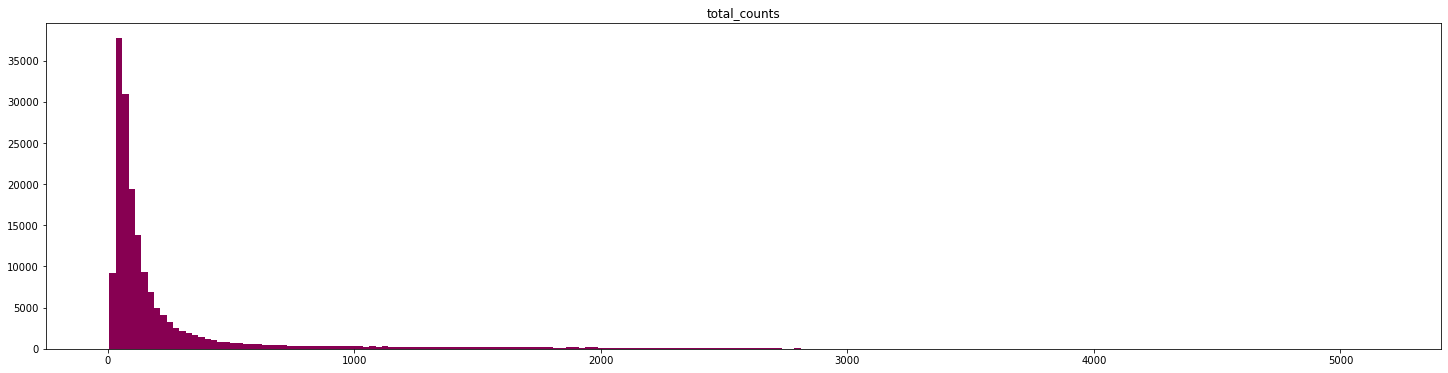

In [86]:
adata.var.hist(column = 'total_counts', bins = 200, grid = False, figsize = (25,6), color = '#870052')

In [87]:
thirty_percent = len(adata.obs_names) / 100 * 30
point_one_percent = len(adata.obs_names) / 100 * 0.1
print("30% : {}".format(thirty_percent))
print("0.1% : {}".format(point_one_percent))

30% : 3116.1000000000004
0.1% : 10.387


In [88]:
# Accessible in at least k cells
adata = adata[:,adata.var.total_counts > point_one_percent]
adata = adata[:,adata.var.total_counts < thirty_percent]
adata

View of AnnData object with n_obs × n_vars = 10387 × 173300
    obs: 'code', 'sample', 'multiome_GermCells'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'binary_raw'

In [89]:
# Remove peaks in ENCODE blacklist
adata = adata[:, adata.var.ENCODE_blacklist == 0]
adata

View of AnnData object with n_obs × n_vars = 10387 × 172053
    obs: 'code', 'sample', 'multiome_GermCells'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'binary_raw'

In [90]:
# Filter by width (remove peaks at the lowest end, closest to min peak width in MACS2)

adata = adata[:, adata.var.peak_width > 210]
adata = adata[:, adata.var.peak_width < 1500]
adata

View of AnnData object with n_obs × n_vars = 10387 × 143531
    obs: 'code', 'sample', 'multiome_GermCells'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'binary_raw'

In [91]:
adata.var.head()

,peak_width,exon,gene,promoter,annotation,gene_name,gene_id,tss_distance,ENCODE_blacklist,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
chr1:818667-818886,220,0,0,0,intergenic,NaN,NaN,105041,0,116,0.011168,0.011106,98.883219,116.0,4.762174
chr1:827077-827691,615,0,0,0,intergenic,NaN,NaN,96236,0,647,0.062289,0.060426,93.771060,647.0,6.473891
chr1:869540-870172,633,0,0,0,intergenic,NaN,NaN,53755,0,549,0.052855,0.051505,94.714547,549.0,6.309918
chr1:876378-877525,1148,0,0,0,intergenic,NaN,NaN,46402,0,324,0.031193,0.030716,96.880716,324.0,5.783825
chr1:902611-903058,448,0,0,0,intergenic,NaN,NaN,20869,0,272,0.026187,0.025850,97.381342,272.0,5.609472


In [92]:
adata.var['annotation'].value_counts()

intergenic    59525
intron        51271
exon          27189
promoter       5546
Name: annotation, dtype: int64

In [93]:
adata.obs.head()

,code,sample,multiome_GermCells
01-AAACAGCCAGCCAGAA-1,01,FCA_GND10288176,oogonia_meiotic
01-AAACAGCCATCCAGGT-1,01,FCA_GND10288176,oogonia_STRA8
01-AAACATGCATTGTCCT-1,01,FCA_GND10288176,oogonia_STRA8
01-AAACCGAAGCTTCCCG-1,01,FCA_GND10288176,preOocyte
01-AAACCGAAGGCGAATA-1,01,FCA_GND10288176,oogonia_STRA8


In [94]:
### Filter peaks that are not accessible in at least 5% of cells from a coarse cluster
min_frac=0.03
# Load cluster information from cellatac outputs
clusters = pd.read_table(input["clusters"], header = None, index_col = 0)
clusters.columns = ["cellatac_clusters"]
adata.obs = clusters.loc[adata.obs_names]
adata

AnnData object with n_obs × n_vars = 10387 × 143531
    obs: 'cellatac_clusters'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'binary_raw'

In [95]:
adata.obs.head()

,cellatac_clusters
01-AAACAGCCAGCCAGAA-1,5
01-AAACAGCCATCCAGGT-1,3
01-AAACATGCATTGTCCT-1,3
01-AAACCGAAGCTTCCCG-1,5
01-AAACCGAAGGCGAATA-1,3


In [96]:
n_clusters = len(np.unique(adata.obs[["cellatac_clusters"]]))
clus_mat = np.empty([adata.n_obs, n_clusters])
for cl in np.unique(adata.obs[["cellatac_clusters"]]):
    clus_mat[np.where(adata.obs['cellatac_clusters']==cl)[0],cl] = 1

clus_mat = scipy.sparse.csr_matrix(clus_mat)
clus_mat[clus_mat != 1 ] = 0

/opt/conda/envs/atac_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3427: SparseEfficiencyWarning: Comparing a sparse matrix with a nonzero scalar using != is inefficient, try using == instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [97]:
cl_peak_mat = np.dot(clus_mat.T, adata.layers["binary_raw"])

In [98]:
cl_peak_frac = cl_peak_mat/clus_mat.sum(0).T

In [99]:
cl_peak_frac.max(0).shape

(1, 143531)

In [100]:
bool_matrix = cl_peak_frac.max(0) > min_frac
bool_matrix.shape

(1, 143531)

In [101]:
bool_vector = np.squeeze(np.asarray(bool_matrix))
bool_vector.shape

(143531,)

In [102]:
adata = adata[:, bool_vector]

In [103]:
adata

View of AnnData object with n_obs × n_vars = 10387 × 120127
    obs: 'cellatac_clusters'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'binary_raw'

In [104]:
sc.pp.calculate_qc_metrics(adata, layer = "binary_raw", inplace = True)

Trying to set attribute `.obs` of view, copying.


array([[<AxesSubplot:title={'center':'log1p_total_counts'}>]],
      dtype=object)

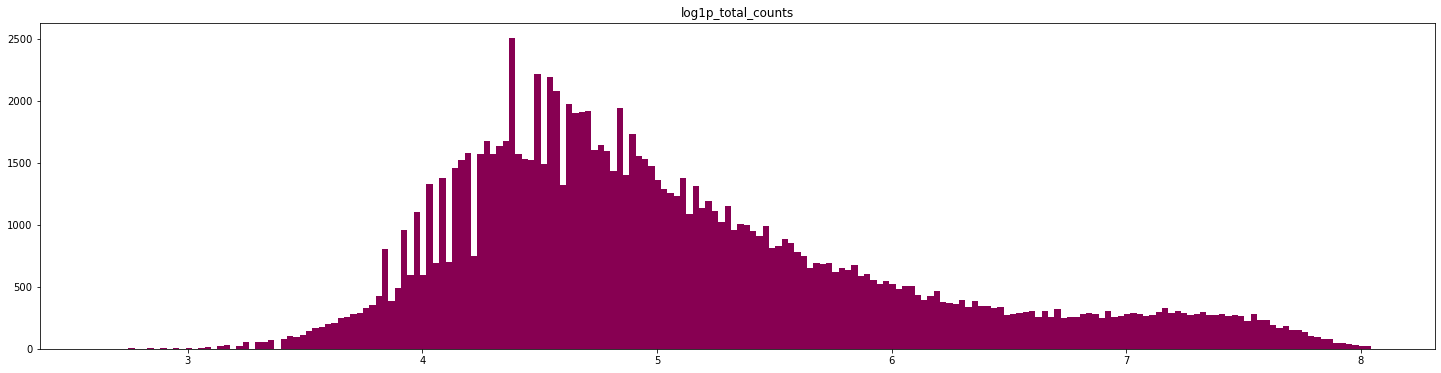

In [105]:
adata.var.hist(column = 'log1p_total_counts', bins = 200, grid = False, figsize = (25,6), color = '#870052')

array([[<AxesSubplot:title={'center':'log1p_total_counts'}>]],
      dtype=object)

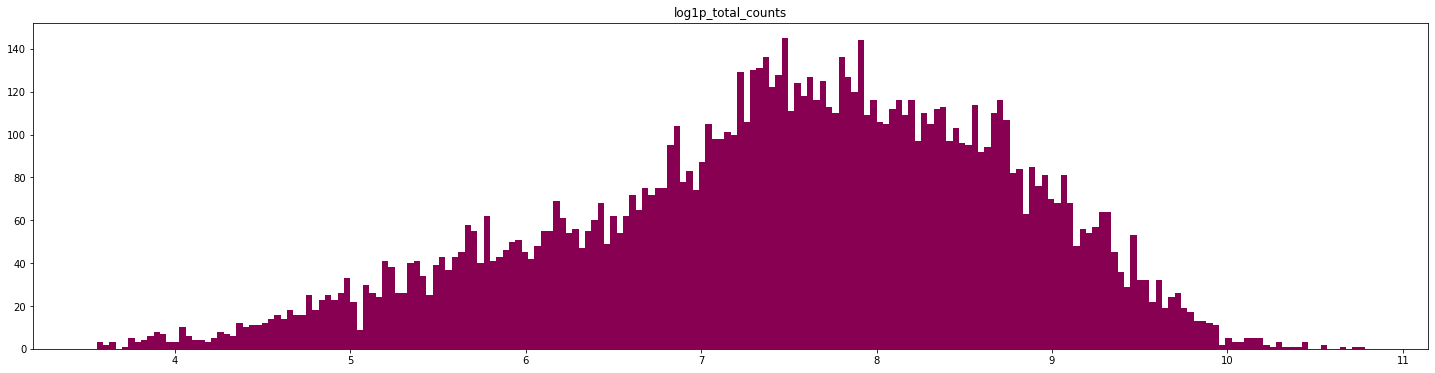

In [106]:
adata.obs.hist(column = 'log1p_total_counts', bins = 200, grid = False, figsize = (25,6), color = '#870052')

In [107]:
adata.obs['multiome_GermCells'] = adata.obs_names.map(pd.Series(germcells.celltype.values,index=germcells.ATAC_barcode).to_dict())


In [108]:
adata.obs.groupby('multiome_GermCells', as_index=False)['log1p_total_counts'].mean()

,multiome_GermCells,log1p_total_counts
0,GC,7.292147
1,PGC,7.383014
2,PGC_mitotic,7.287230
3,oocyte,7.215958
4,oogonia_STRA8,7.463876
5,oogonia_meiotic,7.869999
6,preOocyte,7.314049
7,preSpermatogonia,7.394839


In [110]:
adata.obs['multiome_GermCells'] = adata.obs['multiome_GermCells'].astype(str)

/opt/conda/envs/atac_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'multiome_GermCells' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'annotation' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'gene_name' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'gene_id' as categorical


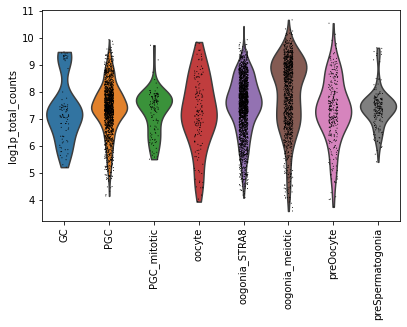

In [111]:
sc.pl.violin(adata[[i not in ['nan', 'lowQC', 'Doublet'] for i in adata.obs['multiome_GermCells']]], keys = ['log1p_total_counts'], groupby = 'multiome_GermCells', rotation = 90,
            save = '_filtering.pdf')

In [112]:
bdata = adata[adata.obs.log1p_total_counts >= 3]
bdata

View of AnnData object with n_obs × n_vars = 10387 × 120127
    obs: 'cellatac_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'multiome_GermCells'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'binary_raw'

In [113]:
bdata.obs['multiome_GermCells'].value_counts()

nan                 4667
oogonia_STRA8       2109
PGC                 1608
oogonia_meiotic     1136
preOocyte            294
preSpermatogonia     197
oocyte               157
PGC_mitotic          126
GC                    93
Name: multiome_GermCells, dtype: int64

In [114]:
## Write output anndata
bdata.write_h5ad(output["h5ad"])

/opt/conda/envs/atac_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'multiome_GermCells' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'annotation' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'gene_name' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'gene_id' as categorical


#### End of notebook